In [18]:
import numpy as np 
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt

# Ejercicio 1

In [19]:
#Se crean los arreglos 
A = np.array([[1,3],[-1,7]])
B = np.array([[5,2],[1,2]])
I = np.array([[1,0],[0,1]])

#Imprimimos en pantalla para saber si fueron ingresadas correctamente
print(A)
print(B)
print(I)

[[ 1  3]
 [-1  7]]
[[5 2]
 [1 2]]
[[1 0]
 [0 1]]


In [20]:

#Calculamos el resultado de 2*I+3*A+A@B
2*I + 3*A + A@B 

array([[13, 17],
       [-1, 35]])

# Ejercicio 2

In [21]:
N = np.random.randint(0,10,[2,2])
print(N)
I = np.array([[1,0],[0,1]])

[[7 1]
 [9 4]]


In [22]:
N@N - (np.trace(N))*N + (la.det(N))*I

array([[0., 0.],
       [0., 0.]])

# Ejercicio 3

In [23]:
def switch_rows(A,i,j):
  'Intercambiar renglones i y j en la matriz A.'
  n = A.shape[0]
  E = np.eye(n)
  E[i,i] = 0
  E[j,j] = 0
  E[i,j] = 1
  E[j,i] = 1
  return E @ A

#Multiplicar un renglón por una cte.
def scale_row(A,k,i):
  'Multiplicar el renglón i por k en la matriz A.'
  n = A.shape[0]
  E = np.eye(n)
  E[i,i] = k
  return E @ A

#Sumar un múltiplo de un renglón a otro renglón.
def add_row(A,k,i,j):
  'Sumar k veces el renglón j al renglón i en la matriz A.'
  n = A.shape[0]
  E = np.eye(n)
  if i == j:
    E[i,i] = k + 1
  else:
      E[i,j] = k
  return E @ A

In [24]:
S = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
print(S)

[[ 1 -3  1]
 [ 3 -4  1]
 [ 0  2 -1]]


In [25]:
S1 = np.hstack([S,np.eye(3)])
print(S1)

[[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [26]:
S2 = add_row(S1,-3,1,0)
print(S2)

[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [28]:
S3_temp = add_row(S2, -2/5, 2, 1)

S3 = scale_row(S3_temp, 3/5, 1)
S3 = add_row(S3,1,0,1)
print(S3)

[[ 1.   0.  -0.2 -0.8  0.6  0. ]
 [ 0.   3.  -1.2 -1.8  0.6  0. ]
 [ 0.   0.  -0.2  1.2 -0.4  1. ]]


In [30]:

S4_temp1 = scale_row(S3,-5,2)

S4_temp2 = scale_row(S4_temp1,-1/1.2,1)

S4_temp3 = add_row(S4_temp2, 0.4, 1, 2)

S4_temp3 = add_row(S4_temp2, 0.2, 0, 2)

S4_temp3 = add_row(S4_temp3, -1, 1, 2)

S4 = scale_row(S4_temp3, -1/2.5, 1)
print(np.round(S4, 2))

[[ 1.  0.  0. -2.  1. -1.]
 [ 0.  1. -0. -3.  1. -2.]
 [ 0.  0.  1. -6.  2. -5.]]


In [32]:
Sinv = S3[:,3:]
print(Sinv)

[[-0.8  0.6  0. ]
 [-1.8  0.6  0. ]
 [ 1.2 -0.4  1. ]]


In [33]:
R = np.array([1,5,0])

print(np.round(Minv @ R))

[ 2.  1. -1.]


In [34]:
solv = la.solve(S,R)
print(solv)

[3. 2. 4.]


# Ejercicio 3

In [35]:
B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])
print(B1)

print(B2)

print(B3)

[[2 0 0]
 [0 3 4]
 [0 4 9]]
[[0 1 0]
 [0 0 1]
 [1 0 0]]
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [37]:
eigvals1, eigvecs1 = la.eig(B1)
print('Eigenvalores B1')
print(np.round(eigvals1,2))
print('Eigenvectores B1')
print(np.round(eigvecs1,2))



Eigenvalores B1
[11.+0.j  1.+0.j  2.+0.j]
Eigenvectores B1
[[ 0.    0.    1.  ]
 [ 0.45  0.89  0.  ]
 [ 0.89 -0.45  0.  ]]


In [38]:
eigvals2, eigvecs2 = la.eig(B2)
print('Eigenvalores B2')
print(np.round(eigvals2,2))
print('Eigenvectores B2')
print(np.round(eigvecs2,2))


Eigenvalores B2
[-0.5+0.87j -0.5-0.87j  1. +0.j  ]
Eigenvectores B2
[[ 0.58+0.j   0.58-0.j  -0.58+0.j ]
 [-0.29+0.5j -0.29-0.5j -0.58+0.j ]
 [-0.29-0.5j -0.29+0.5j -0.58+0.j ]]


In [39]:
eigvals3, eigvecs3 = la.eig(B3)
print('Eigenvalores B3')
print(np.round(eigvals3,2))
print('Eigenvectores B3')
print(np.round(eigvecs3,2))

Eigenvalores B3
[3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores B3
[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.58 -0.58]
 [ 0.    0.   -0.58  0.58]
 [ 1.   -1.    0.58 -0.58]]


# Ejercicio 5

In [41]:
x = np.array([0,0.5,1,1.5,2,2.5,3,3.5])
y = np.array([0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078]).reshape(8,1)

X = np.column_stack([x**k for k in range(0,8)])

a = la.solve(X,y)
print(a)

[[ 0.00000000e+00]
 [ 1.00067181e+00]
 [-3.70788889e-03]
 [-1.58867889e-01]
 [-8.30222222e-03]
 [ 1.31964444e-02]
 [-1.54488889e-03]
 [ 2.46349206e-05]]


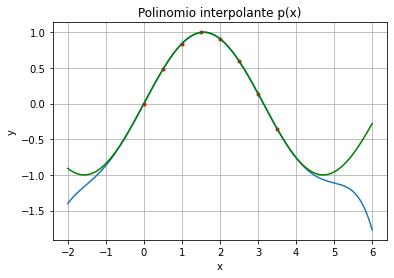

In [42]:

xs = np.linspace(-2,6,200)
ys = sum([a[k]*xs**k for k in range(0,8)])
ysin = np.sin(xs)

plt.plot(x,y,'r.',xs,ys)
plt.plot(xs, ysin, 'green')
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()